# Processing images with Julia

Surprise! Also Julia handles images. And it does it pretty well. Mmm, maybe that's not a surprise, is it?

As in R (and Python and many other languages) Julia consider **images as arrays** (or as something that can be translated into an array).

From mathematics, remember that in a vector each element (entry, value, ...) is indexed by one coordinate (the position in the vector); in a matrix each element is indexed by 2 coordinates (the row and column number). An _array_ (sometimes they are known as _tensors_) is a generalization of this idea. In an array of dimension 3 each element is indexed by 3 coordinates (think about specifying the position of a point in a "cube", or a "stack" of matrices). In an array of dimension k each element is indexed by k coordinates.

That is, in first approximation, in Julia an image is a "stack" of different matrices. Keep this in mind.

## Loading images

The main package that handles everything is called `Images`. **Install it**. The documentation is [here](https://juliaimages.github.io/latest/).    
We are also using `FileIO` to handle the loading of images.

In [1]:
# import Pkg; Pkg.add("Images"); Pkg.add("FileIO"); Pkg.add("ImageMagick")
using Images # this runs if you have installed images.
using FileIO
using ImageMagick 

To load one image, we can use `load()`. This will read a file and, if you are using Images, determine the type of image and load it in memory.

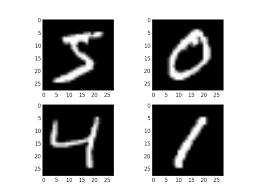

In [2]:
ImageMagick.load_("./images/digits.png")

If we want to load all the images in a folder, we can use `map()`. Julia's `map()` works very similarly to R's purrr's `map()`, with the tweak that the function to be mapped is the first argument, and the stuffed to be mapped is the second input. To load all the black and white images we can do something like:

In [3]:
image_list = map(x -> load("images/" * x), readdir("images/"));

┌ Warning: Premature end of JPEG byte sequence.
└ @ JpegTurbo C:\Users\thoma\.julia\packages\JpegTurbo\b5MSG\src\decode.jl:221
┌ Warning: Premature end of JPEG byte sequence.
└ @ JpegTurbo C:\Users\thoma\.julia\packages\JpegTurbo\b5MSG\src\decode.jl:221


Notice three things: (0) the * operator concatenes string (try it!), (1) the semicolon, ;, at the end of the line avoids that the outputs of the mapping gets printed to screen and (2) `readdir()` is a function that lists the name of all the file in a folder (try it!).

As we would have expected from the introduction, the type of an immage is an Array. But an array of what?

In [4]:
load("./images/digits.png") |> typeof

IndirectArrays.IndirectArray{RGB{N0f8}, 2, UInt8, Matrix{UInt8}, OffsetArrays.OffsetVector{RGB{N0f8}, Vector{RGB{N0f8}}}}

In [5]:
load("./images/forest.jpg") |> typeof

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

They are 2 dimensional arrays (the last 2 in the output) of special things called `RGB{Normed{UInt8,8}}`. This are colored pixels. So, each entry in the 2 dimensional arrays is, itself, an array of a special kind. If you notice, even the black and white image has been loaded as a colored image. Let's load an image and look more in the details.

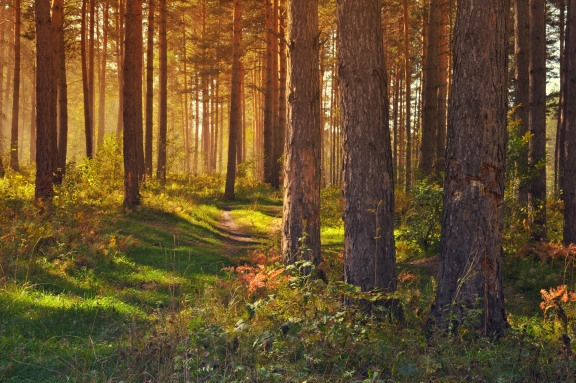

In [6]:
forest = load("./images/forest.jpg") 

As we have said, an image is an array indexed by two coordinates. Let's take a look at one of the pixel by indexing it.  
The first coordinate is the vertical position in the image (compare the following output with the leftmost edge of the forest):

In [7]:
forest[:,1]

The second is the horizontal position:

In [8]:
forest[1,:]

If we access directly one pixel, we get the color of that pixel.

In [9]:
forest[1,1] 

To break it into its components, we need to use some special syntax.

In [10]:
red(forest[1,1]), green(forest[1,1]), blue(forest[1,1])

(0.58N0f8, 0.396N0f8, 0.184N0f8)

In [11]:
dump(forest[1,1])

RGB{N0f8}
  r: N0f8
    i: UInt8 0x94
  g: N0f8
    i: UInt8 0x65
  b: N0f8
    i: UInt8 0x2f


The above triplet is the amunt of red, green, and blue in that pixel.   
Every pixel has an r (red), g (green), and b (blue) value.   
The number notation is probably novel to many. But it's only a different numerical basis, called a "fixed-point number". From the JuliaImages manual:
> The N0f8 means **N** ormalized with **8** **f** ractional bits, with **0** bits left for representing values higher than 1.

Single snapshot images (i.e., pictures) are n times m times 1 array of RGB pixels (values are scaled between 0 and 1, not 1 and 256).

In [12]:
forest[:,:,:]

383×576×1 Array{RGB{N0f8},3} with eltype RGB{N0f8}:
[:, :, 1] =
 RGB{N0f8}(0.58,0.396,0.184)   …  RGB{N0f8}(0.271,0.2,0.192)
 RGB{N0f8}(0.749,0.553,0.353)     RGB{N0f8}(0.255,0.184,0.176)
 RGB{N0f8}(0.557,0.357,0.173)     RGB{N0f8}(0.267,0.192,0.176)
 RGB{N0f8}(0.545,0.345,0.176)     RGB{N0f8}(0.275,0.2,0.184)
 RGB{N0f8}(0.494,0.282,0.133)     RGB{N0f8}(0.263,0.188,0.165)
 RGB{N0f8}(0.494,0.251,0.098)  …  RGB{N0f8}(0.259,0.184,0.157)
 RGB{N0f8}(0.686,0.4,0.231)       RGB{N0f8}(0.263,0.184,0.157)
 RGB{N0f8}(0.655,0.333,0.149)     RGB{N0f8}(0.251,0.173,0.145)
 RGB{N0f8}(0.667,0.396,0.141)     RGB{N0f8}(0.275,0.196,0.169)
 RGB{N0f8}(0.694,0.416,0.173)     RGB{N0f8}(0.286,0.204,0.184)
 RGB{N0f8}(0.725,0.431,0.204)  …  RGB{N0f8}(0.282,0.208,0.192)
 RGB{N0f8}(0.714,0.431,0.204)     RGB{N0f8}(0.271,0.192,0.188)
 RGB{N0f8}(0.702,0.427,0.196)     RGB{N0f8}(0.263,0.192,0.192)
 ⋮                             ⋱  ⋮
 RGB{N0f8}(0.196,0.267,0.22)      RGB{N0f8}(0.118,0.098,0.114)
 RGB{N0f8}(0.153,0.247

## Processing

We can extract all the color channels broadcasting (the . operator) the red(), blue(), and green() function on the image.

In [13]:
red.(forest)

383×576 Array{N0f8,2} with eltype N0f8:
 0.58   0.576  0.541  0.486  0.525  …  0.302  0.294  0.282  0.267  0.271
 0.749  0.549  0.565  0.525  0.502     0.337  0.329  0.306  0.271  0.255
 0.557  0.525  0.486  0.475  0.533     0.322  0.31   0.298  0.271  0.267
 0.545  0.49   0.533  0.557  0.537     0.286  0.278  0.275  0.271  0.275
 0.494  0.569  0.553  0.565  0.522     0.294  0.278  0.278  0.267  0.263
 0.494  0.467  0.545  0.529  0.49   …  0.298  0.275  0.278  0.267  0.259
 0.686  0.62   0.651  0.639  0.576     0.282  0.259  0.267  0.267  0.263
 0.655  0.671  0.663  0.647  0.631     0.294  0.267  0.271  0.259  0.251
 0.667  0.71   0.643  0.573  0.612     0.286  0.278  0.271  0.259  0.275
 0.694  0.678  0.624  0.612  0.608     0.29   0.282  0.271  0.263  0.286
 0.725  0.667  0.573  0.584  0.592  …  0.298  0.282  0.263  0.255  0.282
 0.714  0.667  0.596  0.616  0.616     0.294  0.282  0.255  0.243  0.271
 0.702  0.659  0.624  0.643  0.635     0.282  0.282  0.263  0.243  0.263
 ⋮         

To visualize this, we can use the `colorview()` function:

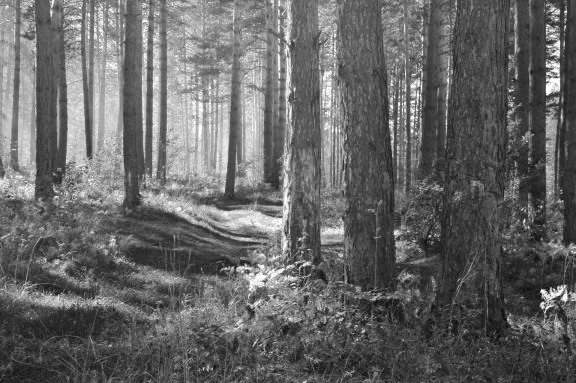

In [14]:
colorview(Gray,red.(forest))

**your turn**

extract and visualize the other channels.

In [15]:
# your code goes here

### Some noise

With Julia, we can easily create some noise for an image. Let's see how.

The function `rand()` creates random samples of a certain **size** and of a certain **type**.

The size we need is the size of the image.

In [16]:
size(forest)

(383, 576)

The type of the element we want to randomly create is the type of the colored pixels. Let's see how:

In [17]:
eltype(forest)

RGB{N0f8}

We are almost there. Now we need to create some random samples using rand(). The same size as the **forest** image.

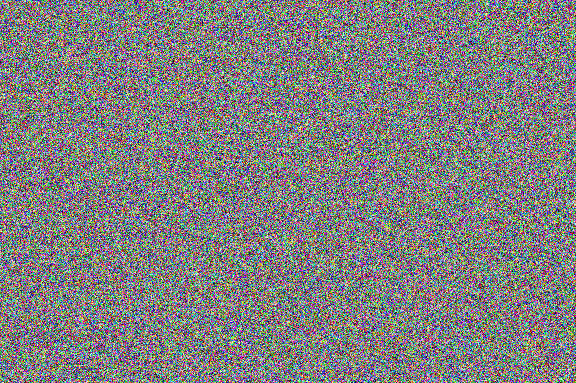

In [18]:
rand(eltype(forest),size(forest))

We can create some random samples of a particular size using rand().

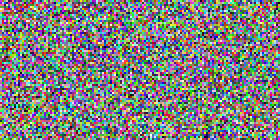

In [19]:
rand(RGB{N0f8},(70,140))

Contemporary Art Museum, here we come!

**your turn**
put everything together and create a function that takes an image as input and gives back a noise image of the right size and kind as output.

In [20]:
# your code goes here

### Filters

Julia images comes with a lot of different filters and processing algorithms. We are not going over all of them, as they closely resamble the ones offered by R's magick. You can learn more [here](https://juliaimages.github.io/latest/imagefiltering.html) and in the reference page [here](). Just as an example, we can blur an image with a gaussian kernel filter.

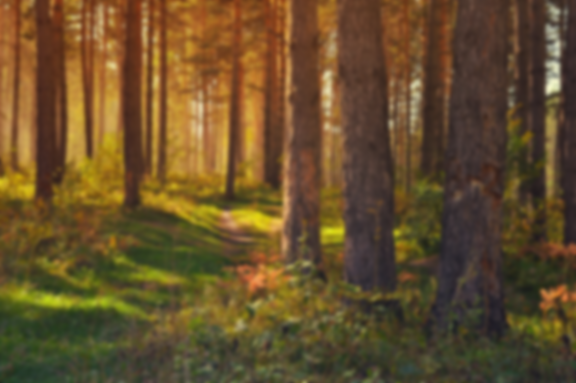

In [21]:
imfilter(forest, Kernel.gaussian(2))

## Saving images

Image are saved using the `save()` function. The first argument is the path where to save, the second is the image to save. The extension of the file determins the type of the image that is going to be saved.

In [22]:
save("forest_blurred_julia.jpg", imfilter(forest, Kernel.gaussian(2)))

41881